These are the features that were used in my model.

This notebook finds `correlation` with the target, and addresses a found website error.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)

#### For `random forest`. No bins.

In [3]:
#this will now have the fixed age for what's shown below
df = pd.read_csv('../datasets/my_data/EDA_825_Rnd4.csv')

In [4]:
df.shape

(40214, 71)

In [5]:
df['TDCJ_ID'].nunique()

40214

In [6]:
#i know this is here, need to fix it in this .csv
df[df['commit_age'] == 0]

,name,TDCJ_ID,pr_crime_0,pr_commit_date_0,pr_term_0,pr_begins_0,pr_crime_1,pr_commit_date_1,pr_term_1,pr_begins_1,pr_crime_2,pr_commit_date_2,pr_term_2,pr_begins_2,pr_crime_3,pr_commit_date_3,pr_term_3,pr_begins_3,sex,race,age,max_sentence,prison_unit,DOB,home_county,proj_release_date,year_of_release,feature_crime,feature_startdate,feature_term,feature_commit_date,target_value,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,age_tester_days,commit_age,feature_term_flt,term_binned_1 to 5 years,term_binned_11 to 15 years,term_binned_16 to 20 years,term_binned_21 to 30 years,term_binned_31 t0 40 years,term_binned_40+ years,term_binned_6 to 10 years,term_binned_Less than 1,age_binned_18 to 30,age_binned_31 to 40,age_binned_41 to 50,age_binned_51 to 60,age_binned_61 to 70,age_binned_Above 70,age_binned_Under 18


<img src="./images/inmate_DOB_error.png" style="float:bottom; margin: 20 px; height: 250px">

In [7]:
df.describe()

,TDCJ_ID,age,year_of_release,final_target,prison_related_crime,tampering_crime,credit_card_crime,elderly_crime,escape_crime,evading_crime,theft_crime,sex_crime,crime_involving_child,drugs_crime,assault_crime,aggravated_crime,deadly_weapon_crime,alcohol_crime,arson_crime,manslaughter_crime,organized_crime,forgery_crime,vehicle_crime,other_crime,commit_age,feature_term_flt,term_binned_1 to 5 years,term_binned_11 to 15 years,term_binned_16 to 20 years,term_binned_21 to 30 years,term_binned_31 t0 40 years,term_binned_40+ years,term_binned_6 to 10 years,term_binned_Less than 1,age_binned_18 to 30,age_binned_31 to 40,age_binned_41 to 50,age_binned_51 to 60,age_binned_61 to 70,age_binned_Above 70,age_binned_Under 18
count,4.021400e+04,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000,40214.000000
mean,1.967179e+06,37.899488,2026.520093,0.745561,0.005396,0.007783,0.007162,0.007012,0.002437,0.025016,0.287213,0.108718,0.139877,0.213234,0.200701,0.204531,0.091958,0.049187,0.004028,0.010792,0.006341,0.015069,0.051425,0.035933,27.427944,8.472906,0.464689,0.080320,0.065997,0.052121,0.023648,0.009748,0.227533,0.075944,0.589795,0.203238,0.080867,0.024394,0.005297,0.000895,0.095514
std,3.769970e+05,11.451988,7.065976,0.435551,0.073261,0.087880,0.084324,0.083447,0.049306,0.156176,0.452468,0.311289,0.346863,0.409597,0.400530,0.403363,0.288970,0.216261,0.063343,0.103325,0.079379,0.121830,0.220866,0.186125,9.489314,9.124151,0.498758,0.271792,0.248280,0.222274,0.151953,0.098250,0.419244,0.264911,0.491877,0.402413,0.272635,0.154272,0.072586,0.029907,0.293927
min,2.904520e+05,16.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.258938,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.873954e+06,29.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.942915,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.119507e+06,36.000000,2024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.742466,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.215698e+06,45.000000,2030.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.405867,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.267513e+06,90.000000,2049.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.447258,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.columns 

Index(['name', 'TDCJ_ID', 'pr_crime_0', 'pr_commit_date_0', 'pr_term_0',
       'pr_begins_0', 'pr_crime_1', 'pr_commit_date_1', 'pr_term_1',
       'pr_begins_1', 'pr_crime_2', 'pr_commit_date_2', 'pr_term_2',
       'pr_begins_2', 'pr_crime_3', 'pr_commit_date_3', 'pr_term_3',
       'pr_begins_3', 'sex', 'race', 'age', 'max_sentence', 'prison_unit',
       'DOB', 'home_county', 'proj_release_date', 'year_of_release',
       'feature_crime', 'feature_startdate', 'feature_term',
       'feature_commit_date', 'target_value', 'final_target',
       'prison_related_crime', 'tampering_crime', 'credit_card_crime',
       'elderly_crime', 'escape_crime', 'evading_crime', 'theft_crime',
       'sex_crime', 'crime_involving_child', 'drugs_crime', 'assault_crime',
       'aggravated_crime', 'deadly_weapon_crime', 'alcohol_crime',
       'arson_crime', 'manslaughter_crime', 'organized_crime', 'forgery_crime',
       'vehicle_crime', 'other_crime', 'age_tester_days', 'commit_age',
       'featur

In [9]:
features = ['prison_related_crime', 'tampering_crime', 'credit_card_crime',
       'elderly_crime', 'escape_crime', 'evading_crime', 'theft_crime',
       'sex_crime', 'crime_involving_child', 'drugs_crime', 'assault_crime',
       'aggravated_crime', 'deadly_weapon_crime', 'alcohol_crime',
       'arson_crime', 'manslaughter_crime', 'organized_crime', 'forgery_crime',
       'vehicle_crime', 'other_crime', 'commit_age', 'feature_term_flt']

In [10]:
X = df[features]
y = df['final_target']

In [11]:
corrs = df.corrwith(df['final_target']).sort_values(ascending=False).to_frame()
corrs.rename(columns = {0: 'Correlation'}, inplace=True)
corrs['Abs_Corr'] = corrs['Correlation'].abs()

corrs.drop('final_target', inplace =True)
corrs.sort_values(by='Abs_Corr', ascending=False)

,Correlation,Abs_Corr
feature_term_flt,-0.266007,0.266007
aggravated_crime,-0.197350,0.197350
deadly_weapon_crime,-0.190088,0.190088
crime_involving_child,-0.169834,0.169834
sex_crime,-0.163347,0.163347
assault_crime,-0.156435,0.156435
term_binned_1 to 5 years,0.156222,0.156222
term_binned_Less than 1,0.149370,0.149370
term_binned_21 to 30 years,-0.146079,0.146079
drugs_crime,0.131978,0.131978


In [12]:
corrs = corrs.sort_values(by='Abs_Corr', ascending=False)

In [13]:
to_plot = corrs['Abs_Corr']

In [16]:
to_plot = pd.DataFrame(to_plot)

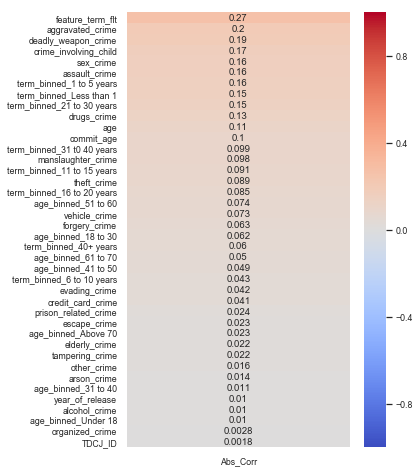

In [19]:
plt.figure(figsize= (5,8))
sns.set(font_scale= .8)
sns.heatmap(to_plot, 
            annot=True, 
            vmin=-1, 
            vmax=1,
            cmap = 'coolwarm',
           );